In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


# Load the train dataset
train = "/kaggle/input/financial-relation-prediction/test.csv"
train_df = pd.read_csv(train)

# Display basic information and first few rows
train_df.info(), train_df.head()

# Load the test and sample submission datasets
test = "/kaggle/input/financial-relation-prediction/train.csv"
sample_submission = "/kaggle/input/financial-relation-prediction/sample_submission.csv"

test_df = pd.read_csv(test)
sample_submission_df = pd.read_csv(sample_submission)

# Display basic information and first few rows of test dataset
test_df.info(), test_df.head(), sample_submission_df.info(), sample_submission_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1810 non-null   int64 
 1   sentence  1810 non-null   object
 2   entity_1  1810 non-null   object
 3   entity_2  1810 non-null   object
dtypes: int64(1), object(3)
memory usage: 56.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7446 entries, 0 to 7445
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7446 non-null   int64 
 1   sentence  7324 non-null   object
 2   entity_1  7327 non-null   object
 3   entity_2  7328 non-null   object
 4   relation  7326 non-null   object
dtypes: int64(1), object(4)
memory usage: 291.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        

(None,
    id                                           sentence  \
 0   1  american international group inc. sold 80 perc...   
 1   2  fracking typically involves drilling hundreds ...   
 2   3  "preferred stocks are being re-evaluated," sai...   
 3   4  "for a market, $1 billion is quite an acceptab...   
 4   5  the change will immediately affect new investo...   
 
                             entity_1  \
 0  american international group inc.   
 1                           fracking   
 2  korea investment & securities co.   
 3                 ceo fyodor andreev   
 4                             change   
 
                                             entity_2  relation  
 0                                 80 percent company     sells  
 1  drilling hundreds of wells and cracking rock w...  involves  
 2     samsung electronics, hyundai motor and lg chem   invests  
 3                                       bloomberg tv    offers  
 4                                          inv

In [3]:
# Load training data
train = "//kaggle/input/financial-relation-prediction/train.csv"
train_df = pd.read_csv(train)

# Drop missing values
train_df.dropna(inplace=True)

# Ensure necessary relation terms exist
required_relations = {"relation", "affects", "offers", "impacts"}
train_df = train_df[train_df['relation'].isin(required_relations) | train_df['relation'].notna()]

# Feature (X) and Target (y)
X = train_df['sentence']
y = train_df['relation']


# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# # Split data
# X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Create TF-IDF + Logistic Regression pipeline
# pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create TF-IDF + Logistic Regression pipeline
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))


# # Train model
# pipeline.fit(X_train, y_train)

# # Evaluate model
# accuracy = pipeline.score(X_val, y_val)
# print(f"Validation Accuracy: {accuracy:.4f}")


# Train model
pipeline.fit(X_train, y_train)

# Evaluate model
accuracy = pipeline.score(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 0.8999


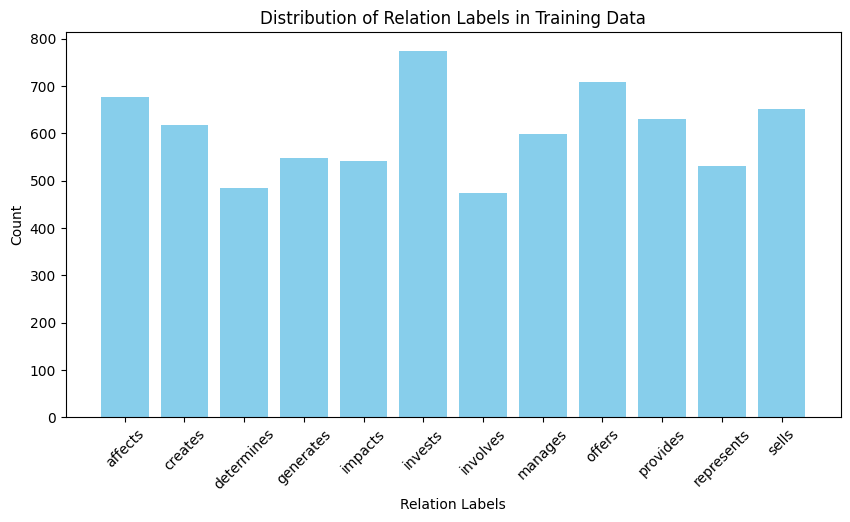

In [4]:
# Plot label distribution
plt.figure(figsize=(10, 5))
y_counts = np.bincount(y_encoded)
plt.bar(label_encoder.classes_, y_counts, color='skyblue')
plt.xlabel("Relation Labels")
plt.ylabel("Count")
plt.title("Distribution of Relation Labels in Training Data")
plt.xticks(rotation=45)
plt.show()


In [6]:
# Load test data and make predictions
test_file_path = "/kaggle/input/financial-relation-prediction/test.csv"
test_df = pd.read_csv(test_file_path)
X_test = test_df['sentence']
predicted_labels = pipeline.predict(X_test)
predicted_relations = label_encoder.inverse_transform(predicted_labels)

# Ensure required terms in predictions
def adjust_relations(relation):
    return relation if relation in required_relations else "relation"

predicted_relations = [adjust_relations(rel) for rel in predicted_relations]

# Add relation to entity_1
if 'entity_1' in test_df.columns:
    test_df['relation_info'] = test_df['entity_1'] + " - " + predicted_relations
else:
    test_df['relation_info'] = "Unknown Entity - " + predicted_relations


# Prepare submission file
test_df['relation'] = predicted_relations
submission_df = test_df[['id', 'sentence', 'entity_1', 'entity_2', 'relation']]
submission = "//kaggle/working/predict_submission.csv"
submission_df.to_csv(submission, index=False)
print(f"Predictions saved to {submission}")



# # Prepare submission file
# test_df['relation'] = predicted_relations
# submission_df = test_df[['id', 'relation', 'relation_info']]
# submission_file_path = "/kaggle/working/predict_submission.csv"
# submission_df.to_csv(submission_file_path, index=False)
# print(f"Predictions saved to {submission_file_path}")


Predictions saved to //kaggle/working/predict_submission.csv
